In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import datetime as dt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
print os.getcwd()
## if you want ot change cwd --> os.chdir(dir_path)

/home/tvsamartha/github/SupplyChain


In [3]:
df_data = pd.read_csv('fhist00.csv')

In [4]:
df_data.head(5)

,SendingfirmID,ReceivingfirmID,Start date of Transaction,End date of Transaction,Amount Sent in $,Amount Received in $,ColG,ColH,ColI,ColJ,ColK,SomeCode
0,153114,153114,40100,43000,2.29,2.31,0.71,0.00,0,0.000,0.30775,AR
1,153114,153114,110100,113000,-65744.30,-65744.30,-20232.80,0.00,0,0.000,0.30775,AR
2,153114,153114,110100,113000,67949.90,67949.90,20232.10,0.00,0,0.000,0.29775,AU
3,113906,1000019,90100,93000,5113.88,5113.96,1573.82,5.11,0,0.001,0.30775,7A
4,113906,113906,90100,93000,2988.00,2987.99,855.91,2.99,0,0.001,0.28645,7D


In [5]:
df_data.columns=['SendingFirmID', 'ReceivingFirmID', 'StartDate', 'EndDate', 'AmountReceived', 'AmountSent', 
                'ColG', 'ColH', 'ColI', 'ColJ', 'ColK', 'SomeCode']

In [6]:
df_data.head(5)

,SendingFirmID,ReceivingFirmID,StartDate,EndDate,AmountReceived,AmountSent,ColG,ColH,ColI,ColJ,ColK,SomeCode
0,153114,153114,40100,43000,2.29,2.31,0.71,0.00,0,0.000,0.30775,AR
1,153114,153114,110100,113000,-65744.30,-65744.30,-20232.80,0.00,0,0.000,0.30775,AR
2,153114,153114,110100,113000,67949.90,67949.90,20232.10,0.00,0,0.000,0.29775,AU
3,113906,1000019,90100,93000,5113.88,5113.96,1573.82,5.11,0,0.001,0.30775,7A
4,113906,113906,90100,93000,2988.00,2987.99,855.91,2.99,0,0.001,0.28645,7D


In [7]:
## modify StartDate and EndDate to mm/dd/yy form

def format_date(data_value):
    data_value = str(data_value)
    while len(data_value) < 6 :
        data_value = "0" + data_value
    
    format_date = ""
    for i in range(0,6):
        if(i % 2 == 0 and i > 0):
            format_date += "/" + data_value[i]
        else :
            format_date += data_value[i]
    return format_date

df_data['StartDate'] = df_data['StartDate'].apply(format_date)
df_data['EndDate'] = df_data['EndDate'].apply(format_date)

In [8]:
df_data.head()

,SendingFirmID,ReceivingFirmID,StartDate,EndDate,AmountReceived,AmountSent,ColG,ColH,ColI,ColJ,ColK,SomeCode
0,153114,153114,04/01/00,04/30/00,2.29,2.31,0.71,0.00,0,0.000,0.30775,AR
1,153114,153114,11/01/00,11/30/00,-65744.30,-65744.30,-20232.80,0.00,0,0.000,0.30775,AR
2,153114,153114,11/01/00,11/30/00,67949.90,67949.90,20232.10,0.00,0,0.000,0.29775,AU
3,113906,1000019,09/01/00,09/30/00,5113.88,5113.96,1573.82,5.11,0,0.001,0.30775,7A
4,113906,113906,09/01/00,09/30/00,2988.00,2987.99,855.91,2.99,0,0.001,0.28645,7D


In [9]:
'''
df_data['StartDate'] = pd.to_datetime(df_data['StartDate'], format='%m/%d/%y')
'''

"\ndf_data['StartDate'] = pd.to_datetime(df_data['StartDate'], format='%m/%d/%y')\n"

In [10]:
df_data['AmountReceived'] = df_data['AmountReceived'].astype(float)
df_data['AmountSent'] = df_data['AmountSent'].astype(float)
df_data['ColG'] = df_data['ColG'].astype(float)
df_data['ColH'] = df_data['ColH'].astype(float)

In [11]:
df_data['Profit'] = np.where(df_data['AmountReceived'] > 0, 1, 0 )

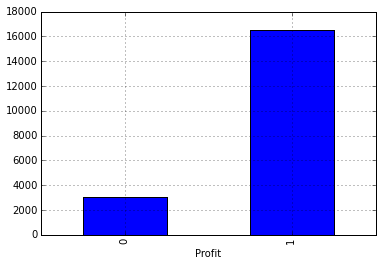

In [12]:
df_data.groupby('Profit').size().plot(kind='bar')

In [13]:
df_profits = df_data.groupby('SendingFirmID').agg({ 'Profit': {'ProfitCount' : np.sum},
                                                    'SendingFirmID': {'SendingFirmIDCount' : 'count'}})

df_profits.columns = df_profits.columns.droplevel(0)

In [14]:
df_profits.head()
##df_profits.columns=['SendingFirmID', 'Profit']


,ProfitCount,SendingFirmIDCount
SendingFirmID,,
100389,82,106
100948,213,248
101059,99,118
101278,61,62
102817,75,81


In [15]:
df_Ids = df_data[['SendingFirmID', 'ReceivingFirmID']]
df_SendingIds = df_data[['SendingFirmID']]


In [16]:
df_profits_data = df_Ids.join(df_profits, on='SendingFirmID', how='outer')

In [17]:
df_profits_data = df_profits_data.rename(columns={'SendingFirmIDCount': 'TransactionCount'})
df_profits_data.head()

,SendingFirmID,ReceivingFirmID,ProfitCount,TransactionCount
0,153114,153114,67,86
1,153114,153114,67,86
2,153114,153114,67,86
74,153114,1000019,67,86
86,153114,153114,67,86


In [18]:
df_profits_data['Profitability'] = df_profits_data['ProfitCount']/df_profits_data['TransactionCount']

In [19]:
df_profits_data.head()

,SendingFirmID,ReceivingFirmID,ProfitCount,TransactionCount,Profitability
0,153114,153114,67,86,0.77907
1,153114,153114,67,86,0.77907
2,153114,153114,67,86,0.77907
74,153114,1000019,67,86,0.77907
86,153114,153114,67,86,0.77907


In [20]:
df_profits_data[df_profits_data['SendingFirmID']==100389].head(5)

,SendingFirmID,ReceivingFirmID,ProfitCount,TransactionCount,Profitability
1172,100389,100389,82,106,0.773585
1173,100389,1000019,82,106,0.773585
1174,100389,100389,82,106,0.773585
1175,100389,506862,82,106,0.773585
1176,100389,152638,82,106,0.773585


In [21]:
df_profits_grouped = df_profits_data.groupby('SendingFirmID')

df_firm_profits_info = df_profits_grouped.agg({'TransactionCount' : max,
                       'ProfitCount' : max,
                       'Profitability' : max})

In [22]:
print df_firm_profits_info.head()
print df_firm_profits_info.shape

               ProfitCount  TransactionCount  Profitability
SendingFirmID                                              
100389                  82               106       0.773585
100948                 213               248       0.858871
101059                  99               118       0.838983
101278                  61                62       0.983871
102817                  75                81       0.925926
(632, 3)


In [23]:
df_firm_profits_info = df_SendingIds.join(df_firm_profits_info, on='SendingFirmID', how='right')

In [24]:
df_firm_profits_info = df_firm_profits_info.drop_duplicates(subset='SendingFirmID', take_last=True)
df_firm_profits_info.head()

,SendingFirmID,ProfitCount,TransactionCount,Profitability
5210,153114,67,86,0.779070
5320,113906,56,79,0.708861
4967,106483,142,161,0.881988
5191,260083,52,63,0.825397
5327,2003821,47,69,0.681159


In [37]:
## which is the best and the worst node in terms of ability to deliver ?
## Look at Profitability 

df_firm_profits_info = df_firm_profits_info.sort(['Profitability'], ascending=False)
df_firm_profits_info.head(15)

,SendingFirmID,ProfitCount,TransactionCount,Profitability
9092,901167,14,14,1
18794,10200696,15,15,1
17055,13200427,7,7,1
7874,522821,18,18,1
17073,80100417,12,12,1
18759,10251527,28,28,1
18790,10249557,13,13,1
18791,10200234,13,13,1
18777,10202097,20,20,1
16985,9800104,5,5,1


In [38]:
df_firm_profits_info.tail(15)

,SendingFirmID,ProfitCount,TransactionCount,Profitability
19229,15502113,28,52,0.538462
14013,2366773,1,2,0.500000
5642,406594,1,2,0.500000
11071,2322821,1,2,0.500000
7315,522571,1,2,0.500000
5736,411206,1,2,0.500000
19088,15507020,1,2,0.500000
13440,12203524,1,2,0.500000
8626,522568,5,10,0.500000
13272,2366356,1,2,0.500000


In [26]:
## is there a relation in the amount in the order and the ability to deliver by a node ?

df_data['AmountReceived'].describe()

count      19520.000000
mean       41646.380966
std       349596.789092
min     -9266320.000000
25%          905.160000
50%         8521.440000
75%        31683.000000
max      9900850.000000
Name: AmountReceived, dtype: float64

In [27]:
df_data['AmountReceived'][df_data['Profit']==1].describe()

count      16489.000000
mean       69151.706434
std       315611.382705
min            0.020000
25%         3672.560000
50%        13060.700000
75%        41567.100000
max      9900850.000000
Name: AmountReceived, dtype: float64

In [28]:
## Are internal demand supply loops within nodes have any bearing on the node's ability to deliver ?

df_data['SelfLoop'] = np.where(df_data['SendingFirmID'] == df_data['ReceivingFirmID'], 1, 0 )

In [29]:
df_data[df_data['SelfLoop'] == 1].head()

,SendingFirmID,ReceivingFirmID,StartDate,EndDate,AmountReceived,AmountSent,ColG,ColH,ColI,ColJ,ColK,SomeCode,Profit,SelfLoop
0,153114,153114,04/01/00,04/30/00,2.29,2.31,0.71,0.00,0,0.000,0.30775,AR,1,1
1,153114,153114,11/01/00,11/30/00,-65744.30,-65744.30,-20232.80,0.00,0,0.000,0.30775,AR,0,1
2,153114,153114,11/01/00,11/30/00,67949.90,67949.90,20232.10,0.00,0,0.000,0.29775,AU,1,1
4,113906,113906,09/01/00,09/30/00,2988.00,2987.99,855.91,2.99,0,0.001,0.28645,7D,1,1
6,113906,113906,08/01/00,08/30/00,-2988.00,-2987.99,-855.91,-2.99,0,0.001,0.28645,7D,0,1


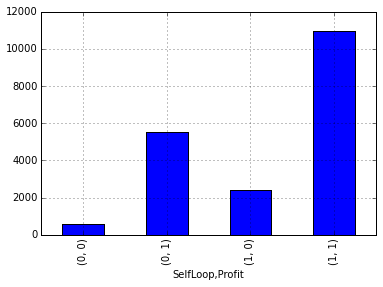

In [30]:
df_data.groupby(['SelfLoop', 'Profit']).size().plot(kind='bar')

In [31]:
df_data_onlyLoop = df_data[df_data['SelfLoop'] == 1]
df_data_onlyLoop.head()

,SendingFirmID,ReceivingFirmID,StartDate,EndDate,AmountReceived,AmountSent,ColG,ColH,ColI,ColJ,ColK,SomeCode,Profit,SelfLoop
0,153114,153114,04/01/00,04/30/00,2.29,2.31,0.71,0.00,0,0.000,0.30775,AR,1,1
1,153114,153114,11/01/00,11/30/00,-65744.30,-65744.30,-20232.80,0.00,0,0.000,0.30775,AR,0,1
2,153114,153114,11/01/00,11/30/00,67949.90,67949.90,20232.10,0.00,0,0.000,0.29775,AU,1,1
4,113906,113906,09/01/00,09/30/00,2988.00,2987.99,855.91,2.99,0,0.001,0.28645,7D,1,1
6,113906,113906,08/01/00,08/30/00,-2988.00,-2987.99,-855.91,-2.99,0,0.001,0.28645,7D,0,1


In [32]:
print df_data_onlyLoop['SendingFirmID'].count()
print df_data_onlyLoop.groupby('Profit').size()

print df_data_onlyLoop.groupby('Profit').size()/df_data_onlyLoop['SendingFirmID'].count()

13411
Profit
0          2437
1         10974
dtype: int64
Profit
0         0.181717
1         0.818283
dtype: float64


In [33]:
## So only 81.8% of the times, having a self loop has lead to profit

## Now what about non-loop Xn ?

df_data_noLoop = df_data[df_data['SelfLoop'] == 0]
df_data_noLoop.head()

,SendingFirmID,ReceivingFirmID,StartDate,EndDate,AmountReceived,AmountSent,ColG,ColH,ColI,ColJ,ColK,SomeCode,Profit,SelfLoop
3,113906,1000019,09/01/00,09/30/00,5113.88,5113.96,1573.82,5.11,0,0.00100,0.307750,7A,1,0
5,113906,1000019,08/01/00,08/30/00,-5113.88,-5113.96,-1573.82,-5.11,0,0.00100,0.307750,7A,0,0
7,106483,2003855,09/01/00,09/30/00,-16191.00,-16191.00,-3554.94,-12.14,0,0.00075,0.219563,7B,0,0
8,106483,2003855,10/01/00,10/30/00,-10046.30,-10046.20,-2205.78,-7.53,0,0.00075,0.219563,7B,0,0
9,106483,2003855,11/01/00,11/30/00,-34074.50,-34074.50,-7481.49,-25.56,0,0.00075,0.219563,7B,0,0


In [34]:
print df_data_noLoop['SendingFirmID'].count()
print df_data_noLoop.groupby('Profit').size()

print df_data_noLoop.groupby('Profit').size()/df_data_noLoop['SendingFirmID'].count()

6109
Profit
0          594
1         5515
dtype: int64
Profit
0         0.097234
1         0.902766
dtype: float64


In [36]:
## Analysis of "SomeCode"
df_data_onlyProfit = df_data[df_data['Profit'] == 1]
df_data_onlyProfit.head()

,SendingFirmID,ReceivingFirmID,StartDate,EndDate,AmountReceived,AmountSent,ColG,ColH,ColI,ColJ,ColK,SomeCode,Profit,SelfLoop
0,153114,153114,04/01/00,04/30/00,2.29,2.31,0.71,0.00,0,0.000,0.30775,AR,1,1
2,153114,153114,11/01/00,11/30/00,67949.90,67949.90,20232.10,0.00,0,0.000,0.29775,AU,1,1
3,113906,1000019,09/01/00,09/30/00,5113.88,5113.96,1573.82,5.11,0,0.001,0.30775,7A,1,0
4,113906,113906,09/01/00,09/30/00,2988.00,2987.99,855.91,2.99,0,0.001,0.28645,7D,1,1
10,260083,260083,10/01/00,10/30/00,31928.60,31928.60,9746.21,31.93,0,0.001,0.30525,6A,1,1


In [49]:
df_temp = df_data_onlyProfit.groupby(['SomeCode', 'Profit']).size().order(ascending=False)

In [50]:
df_temp.head(20)

SomeCode  Profit
I8        1         1022
28        1          980
7A        1          780
7C        1          684
6A        1          543
7B        1          498
WU        1          457
25        1          369
UD        1          335
6B        1          310
CF        1          274
T0        1          243
7D        1          214
MN        1          202
TT        1          192
15        1          186
7F        1          167
P8        1          163
13        1          163
1T        1          159
dtype: int64

In [51]:
df_temp.tail(20)

SomeCode  Profit
B1        1         1
PZ        1         1
QT        1         1
A2        1         1
WZ        1         1
65        1         1
68        1         1
69        1         1
73        1         1
7N        1         1
86        1         1
TZ        1         1
TX        1         1
8I        1         1
JD        1         1
9E        1         1
SB        1         1
9Q        1         1
A1        1         1
KL        1         1
dtype: int64